In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc

import seaborn as sns
from sklearn.metrics import confusion_matrix

In [50]:
X_train=pd.read_csv("train.csv")
X_test=pd.read_csv("test.csv")

In [51]:
print(
    "X_train.shape: ", X_train.shape
    , "X_train.info(): ", X_train.info()
    , "X_test.shape: ", X_test.shape
    , "X_test.info(): ", X_test.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [52]:
print(
    X_train.satisfaction.unique()
    , X_test.satisfaction.unique()
    , X_train.Class.unique()
    , X_test.Class.unique()
)

['neutral or dissatisfied' 'satisfied'] ['satisfied' 'neutral or dissatisfied'] ['Eco Plus' 'Business' 'Eco'] ['Eco' 'Business' 'Eco Plus']


In [53]:
X_train.dropna()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [54]:
X_test.dropna()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [55]:
iqr = np.quantile(X_test['Flight Distance'],0.75)-np.quantile(X_test['Flight Distance'],0.25)
iqr

1330.0

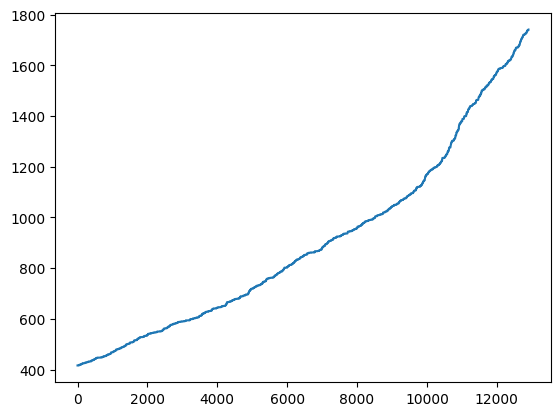

In [56]:
kozepfolde = list()
for x in X_test['Flight Distance']:
  if x > np.quantile(X_test['Flight Distance'],0.25):
    if x < np.quantile(X_test['Flight Distance'],0.75):
      kozepfolde.append(x)

kozepfolde.sort()
plt.plot(kozepfolde)
plt.show()

In [57]:
satisf={"satisfied": 1, "neutral or dissatisfied": 0}
X_train["satisfaction"]=X_train["satisfaction"].map(satisf)
X_test["satisfaction"]=X_test["satisfaction"].map(satisf)

In [58]:
classn={"Business": 2, "Eco": 0, "Eco Plus": 1}
X_train["Class"]=X_train["Class"].map(classn)
X_test["Class"]=X_test["Class"].map(classn)

In [59]:
X_train["satisfaction"].corr(X_train["Class"])

0.49447146454758056

<ipython-input-60-cd80499a4759>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.corr()["satisfaction"].plot(kind="bar")


<Axes: >

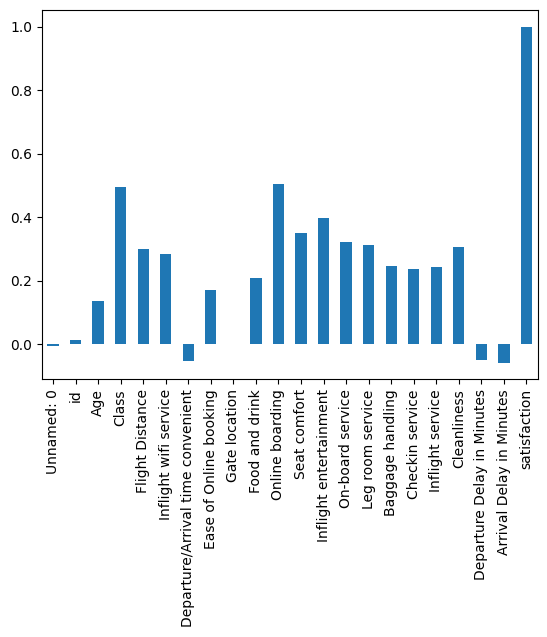

In [60]:
X_train.corr()["satisfaction"].plot(kind="bar")

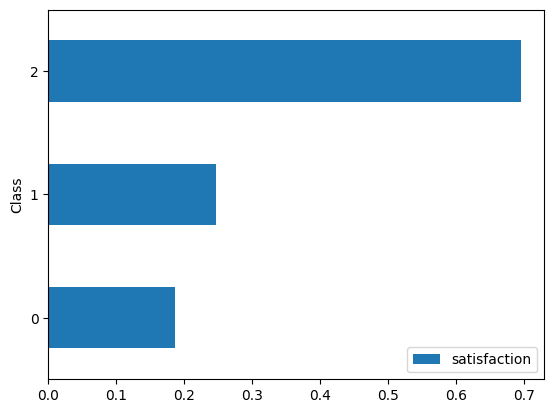

In [61]:
ax=X_train.groupby("Class")["satisfaction"].mean().plot.barh(legend=True)

<Axes: ylabel='AgeGroup'>

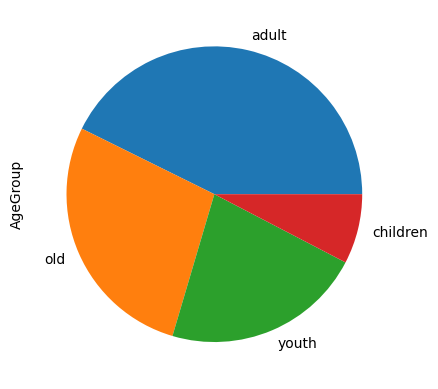

In [62]:
X_train["Age"].value_counts(bins=5)

def Age2AgeGroup(age: int):
  if 0 <= age < 18:
    return "children"
  if 18 <= age < 30:
    return "youth"
  if 30 <= age < 50:
    return "adult"
  if 50 <= age:
    return "old"
  return None

X_train["Age"].apply(Age2AgeGroup) 

X_train["AgeGroup"] = X_train["Age"].apply(Age2AgeGroup)

X_train["AgeGroup"].value_counts()

X_train["AgeGroup"].value_counts().plot.pie()

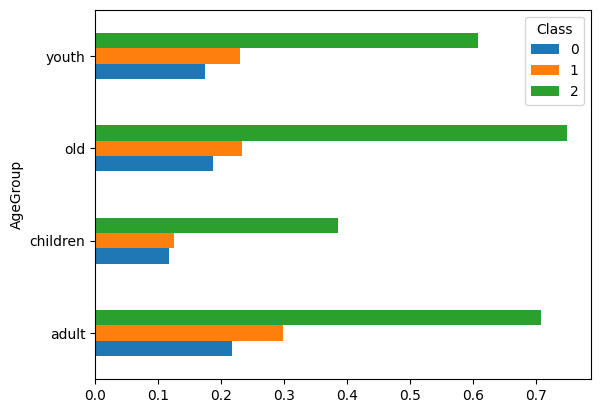

In [63]:
bx=X_train.groupby(["AgeGroup","Class"])["satisfaction"].mean().unstack().plot.barh(legend=True)

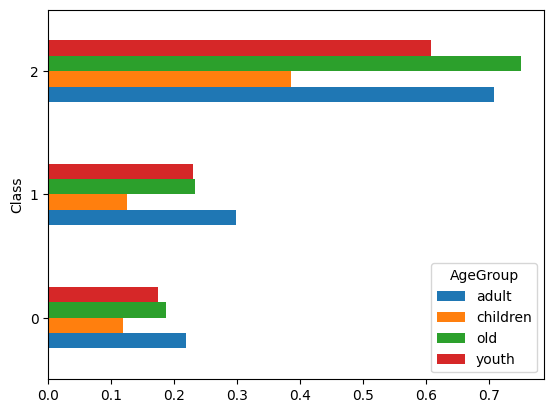

In [64]:
bx=X_train.groupby(["Class","AgeGroup"])["satisfaction"].mean().unstack().plot.barh(legend=True)

In [65]:
y_train=X_train["satisfaction"]
X_train = X_train.drop(columns = ["satisfaction","AgeGroup"])


y_test=X_test["satisfaction"]
X_test = X_test.drop(columns = "satisfaction")

In [66]:
train_num_cols = [
    column for column in X_train.columns
      if X_train[column].dtype in ["int64","float64"]
]

train_cat_cols = [
    column for column in X_train.columns
      if X_train[column].dtype == "object"
]
print(
    train_num_cols
    ,train_cat_cols
)

['Unnamed: 0', 'id', 'Age', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'] ['Gender', 'Customer Type', 'Type of Travel']


In [67]:
test_num_cols = [
    column for column in X_test.columns
      if X_train[column].dtype in ["int64","float64"]
]

test_cat_cols = [
    column for column in X_test.columns
      if X_test[column].dtype == "object"
]
print(
    test_num_cols
    ,test_cat_cols
)

['Unnamed: 0', 'id', 'Age', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'] ['Gender', 'Customer Type', 'Type of Travel']


In [68]:
#test
num_steps = [
    ("imputer", SimpleImputer(strategy = "mean"))
]
num_pipe = Pipeline(steps = num_steps)

cat_steps = [
    ("imputer", SimpleImputer(strategy = "most_frequent"))
    ,("onehot", OneHotEncoder(handle_unknown = "ignore"))
]
cat_pipe = Pipeline(steps = cat_steps)

preprocessor = ColumnTransformer(transformers = [
    ("num", num_pipe, test_num_cols)
    , ("cat", cat_pipe, test_cat_cols)
])

#train
num_steps = [
    ("imputer", SimpleImputer(strategy = "mean"))
]
num_pipe = Pipeline(steps = num_steps)

cat_steps = [
    ("imputer", SimpleImputer(strategy = "most_frequent"))
    ,("onehot", OneHotEncoder(handle_unknown = "ignore"))
]
cat_pipe = Pipeline(steps = cat_steps)

preprocessor = ColumnTransformer(transformers = [
    ("num", num_pipe, train_num_cols)
    , ("cat", cat_pipe, train_cat_cols)
])

In [69]:
pipe_steps_rfc = [
    ("preprocessor", preprocessor)
    ,("rf",RandomForestClassifier(random_state = 0))
]
pipe_rfc = Pipeline(
    steps = pipe_steps_rfc
)

In [70]:
pipe_rfc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Unnamed: 0', 'id', 'Age',
                                                   'Class', 'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   '...oom service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel'])])),
                ('rf', RandomForestClassifier(random_state=0))])

In [71]:
preds_rfc = pipe_rfc.predict(X_test)
score_rfc = accuracy_score(y_test, preds_rfc)
print(round(score_rfc*100,2))

96.52


In [72]:
cm_rfc=confusion_matrix(y_test,preds_rfc)
cm_rfc

array([[14289,   284],
       [  620, 10783]])

In [73]:
pipe_steps_log = [
    ("preprocessor", preprocessor)
    ,("logistic",LogisticRegression())
]
pipe_log = Pipeline(
    steps = pipe_steps_log
)

In [74]:
pipe_log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Unnamed: 0', 'id', 'Age',
                                                   'Class', 'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel'])])),
                ('logistic', LogisticRegression())])

In [75]:
preds_log = pipe_log.predict(X_test)
score_log = accuracy_score(y_test, preds_log)
print(round(score_log*100,2))

65.49


In [76]:
cm_logistic=confusion_matrix(y_test,preds_log)
cm_logistic

array([[7043, 7530],
       [1435, 9968]])

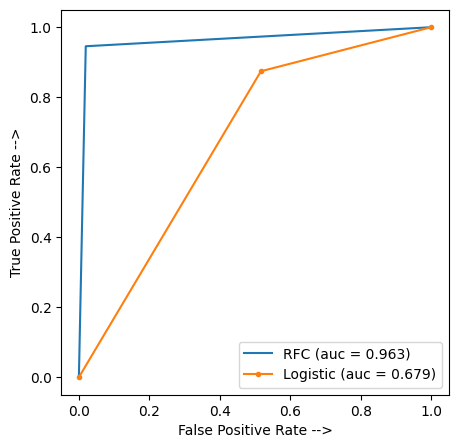

In [77]:
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, preds_log)
auc_logistic = auc(logistic_fpr, logistic_tpr)

rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, preds_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rfc_fpr, rfc_tpr, linestyle='-', label='RFC (auc = %0.3f)' % auc_rfc)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()